In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
building_id = 32
subset_df = pd.read_csv('/Users/veronica/Library/CloudStorage/GoogleDrive-veronicahangsan@gmail.com/.shortcut-targets-by-id/1FsOPywSgK_wZmrVrSTBVi4q8G3Mg_yMJ/Team-Fermata-Energy/processed_data/subset20.csv')
processed_df = pd.read_csv(f'/Users/veronica/Library/CloudStorage/GoogleDrive-veronicahangsan@gmail.com/.shortcut-targets-by-id/1FsOPywSgK_wZmrVrSTBVi4q8G3Mg_yMJ/Team-Fermata-Energy/processed_data/processed_weather_load_w_timestamp/{building_id}.csv')

In [3]:
processed_df.head()

,timestamp,out.electricity.total.energy_consumption,Dry Bulb Temperature [°C],Relative Humidity [%],heat_index,minute,hour,day,month,is_weekday,is_holiday,max_load_hourly,min_load_hourly,max_temp_hourly,min_temp_hourly,bldg_id
0,2018-01-01 01:00:00,5.420033,-6.10,42.781847,21.02,0,1,1,1,1,1,5.476113,5.420033,-6.1,-6.55,32
1,2018-01-01 01:15:00,5.476113,-6.25,43.350762,20.75,15,1,1,1,1,1,5.476113,5.420033,-6.1,-6.55,32
2,2018-01-01 01:30:00,5.476113,-6.40,43.919676,20.48,30,1,1,1,1,1,5.476113,5.420033,-6.1,-6.55,32
3,2018-01-01 01:45:00,5.476113,-6.55,44.488591,20.21,45,1,1,1,1,1,5.476113,5.420033,-6.1,-6.55,32
4,2018-01-01 02:00:00,5.476113,-6.70,45.057505,19.94,0,2,1,1,1,1,5.476113,5.476113,-6.7,-6.70,32


In [4]:
# target variable
y = processed_df['out.electricity.total.energy_consumption']

# features excluding target
X = processed_df.drop(columns=['out.electricity.total.energy_consumption', 'timestamp', 'bldg_id'])


In [5]:
X = X.interpolate(method='linear')


In [6]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [8]:
# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split (valid values)
}


# grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

/Users/veronica/Library/Python/3.11/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.6s
[CV] END max_depth=None,

In [9]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [10]:
# performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 0.042069578413275854
Mean Squared Error (MSE): 0.02288233567826021
R-squared: 0.9977774832811431


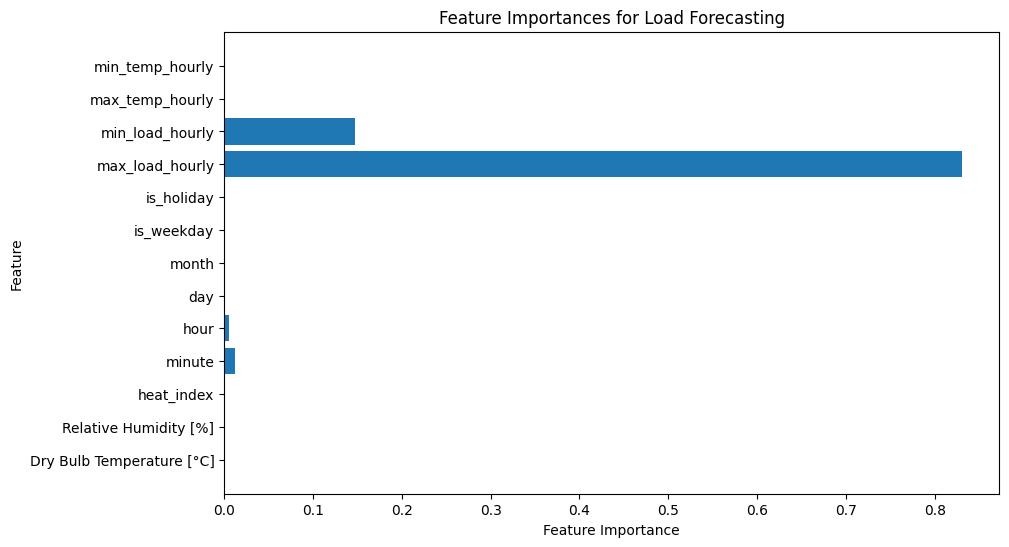

In [12]:
feature_importances = best_rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Load Forecasting')
plt.show()